# DBSCAN cluster analysis

Plotting density of heads per layer in top clusters.

Interesting findings are that the noise and primary cluster seem to separate earlier layers from later layers, later layers being categorized as noise.

Also, the few small clusters that are identified contain a single head, but a number of just those same heads.  At the end of the notebook, we see that these points indices are separated by 144, meaning they come from a sequence of examples.  In squad2, there are typically a number of questions applied to the same context.  Since examples contain both context and question in their input tokens, it makes sense that these examples would have heads working similarly, assigning nearly identical weight mappings since the input shares so many tokens.

In many cases though, where there are more than just a few heads in the cluster, some of the same heads appear in this same cluster, despite being tens of thousands of examples apart - clearly not using the same context.

Also in the epsilon = 0.6, min_samples=10 clustering run visualized second to last in this notebook, some of the largest clusters outside the first largest ( clusters 1,15,13,25,4 ) are curiously populated by heads spanning exclusively the last layer.

In [1]:
import cuml
import cudf
import os
import time

In [2]:
import torch
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def plot_density(df, max_rows=7):
    cluster_counts = df['cluster'].value_counts(sort=True)
    print(f'clusters: {len(cluster_counts)}\n')
    print(cluster_counts[0:9])
    
    top_clusters = cluster_counts.index.to_list()
    num_clusters = len(top_clusters)
    num_columns = 4
    num_rows = int(np.ceil(num_clusters/num_columns))
    fig, axis = plt.subplots(min(num_rows, max_rows), num_columns, figsize=(25,35))

    for i, axs in zip(top_clusters[0:num_clusters], axis.flat):
        bins = np.arange(13) - 0.5
        cluster = df[df['cluster'] == i]
        im = axs.hist2d(cluster['head'],cluster['layer'], bins=bins)
        plt.title(f"Cluster {i}")
        axs.set(xlabel='head', ylabel='layer', xlim=[-1,12], ylim=[12,-1], title=f'Cluster{i}')

In [3]:
output_dir='/rapids/notebooks/host/representations/output/'

In [254]:
df = torch.load(os.path.join(output_dir,'dask_dbscan_865_10_label_df.bin'))

clusters: 1082

 0      530375
-1       30088
 1           8
 314         5
 722         4
 713         4
 266         4
 384         4
 182         4
Name: cluster, dtype: int64


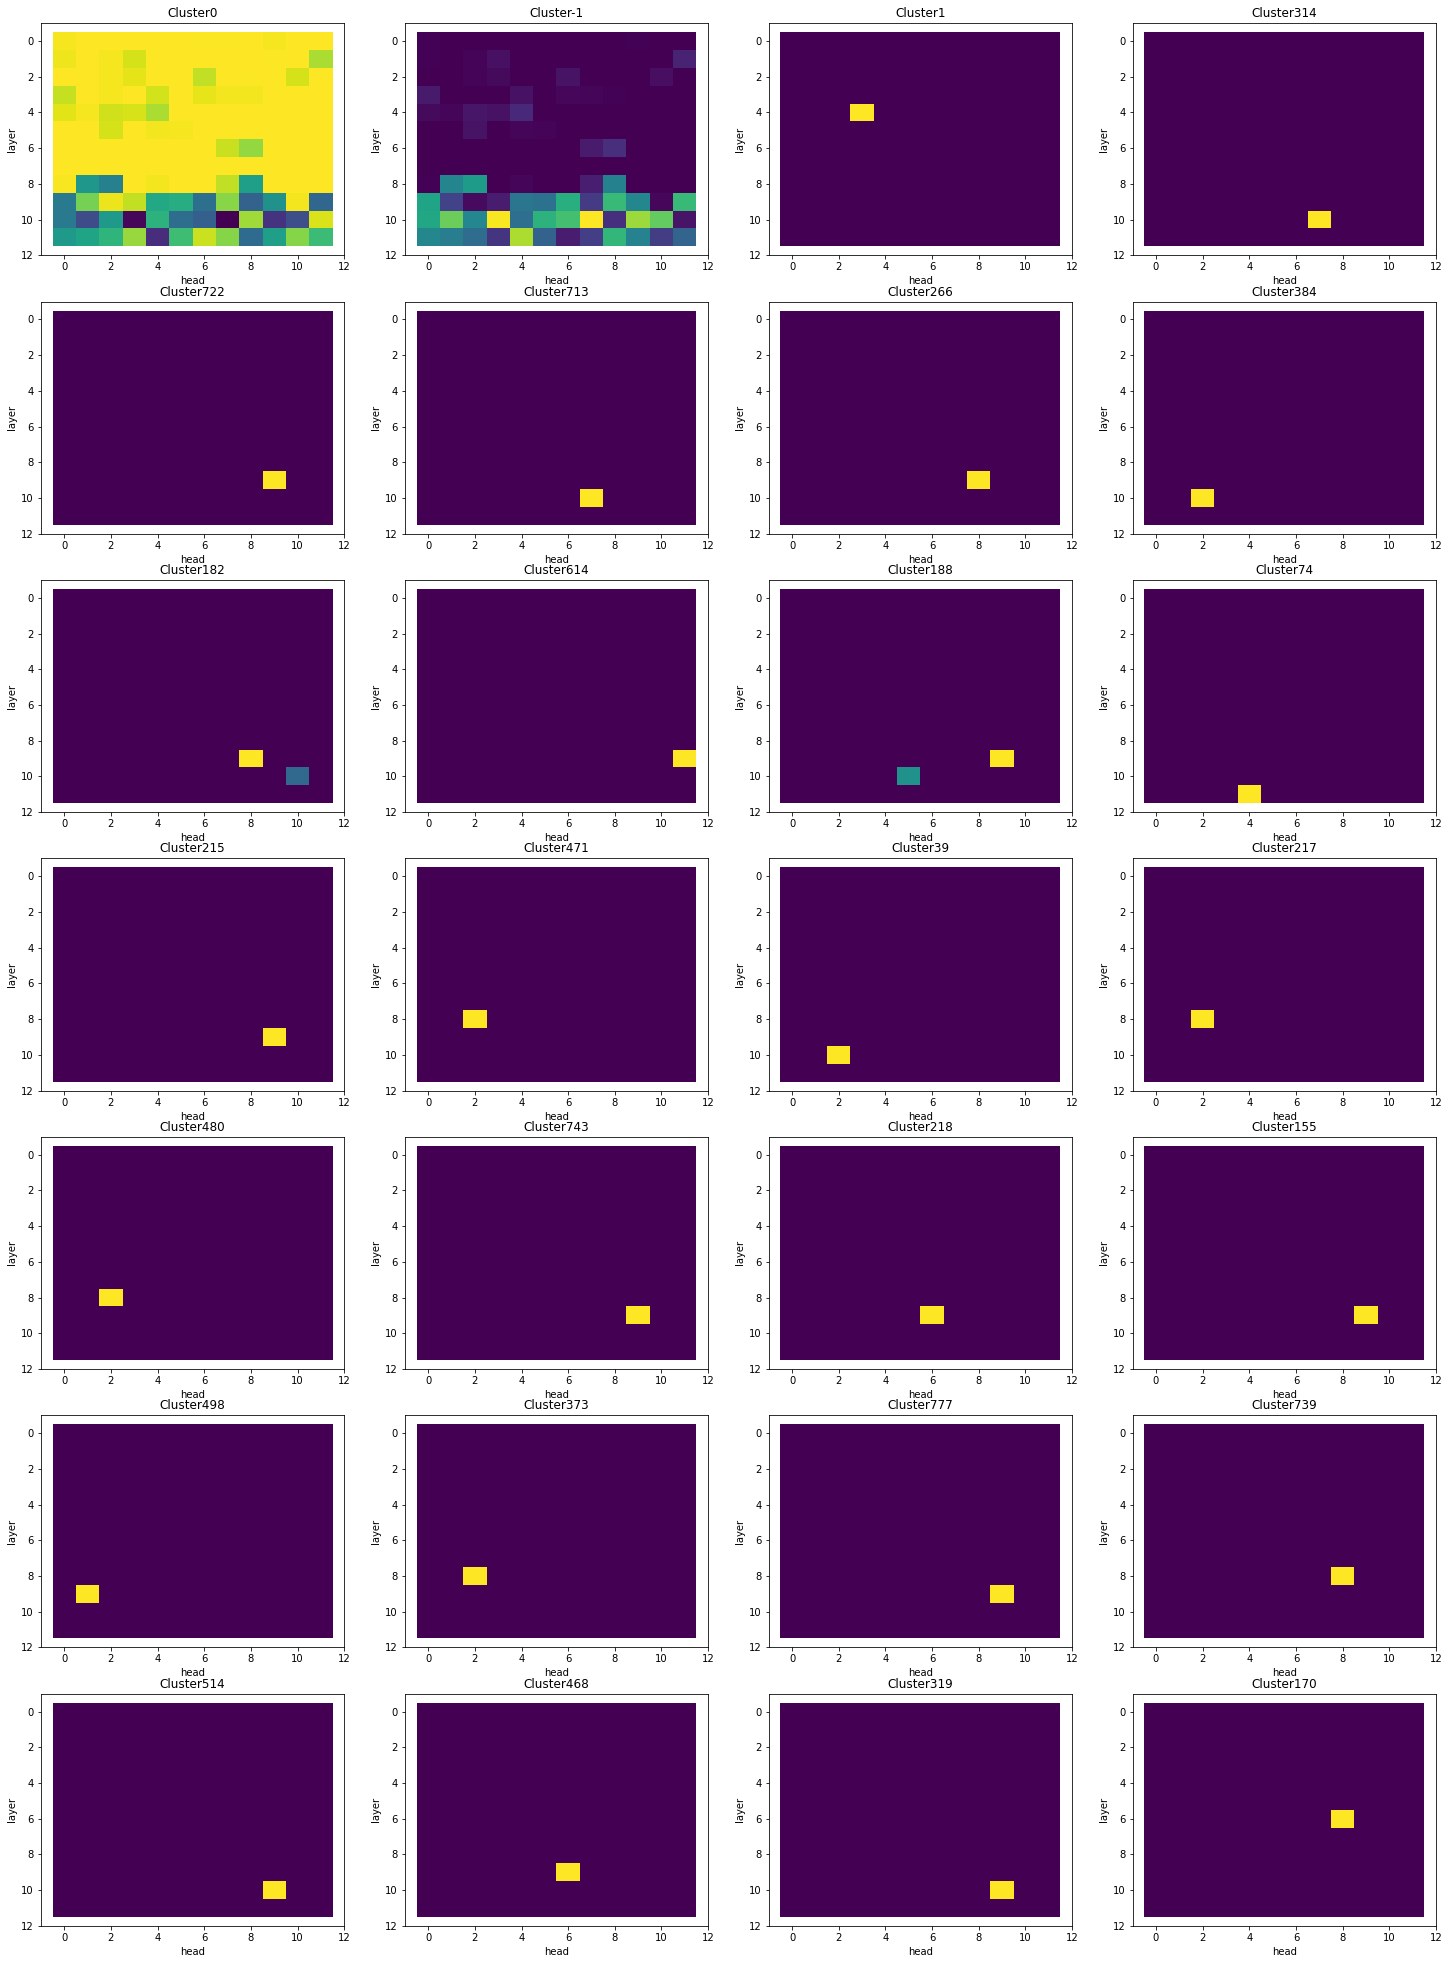

In [264]:
plot_density(df)

In [265]:
# epsilon = 0.87, min_samples=10
df = torch.load(os.path.join(output_dir,'dask_dbscan_87_10_label_df.bin'))

clusters: 18

 0     538709
-1      22703
 6         25
 10        19
 9         14
 8         12
 13        12
 14        12
 1         11
Name: cluster, dtype: int64


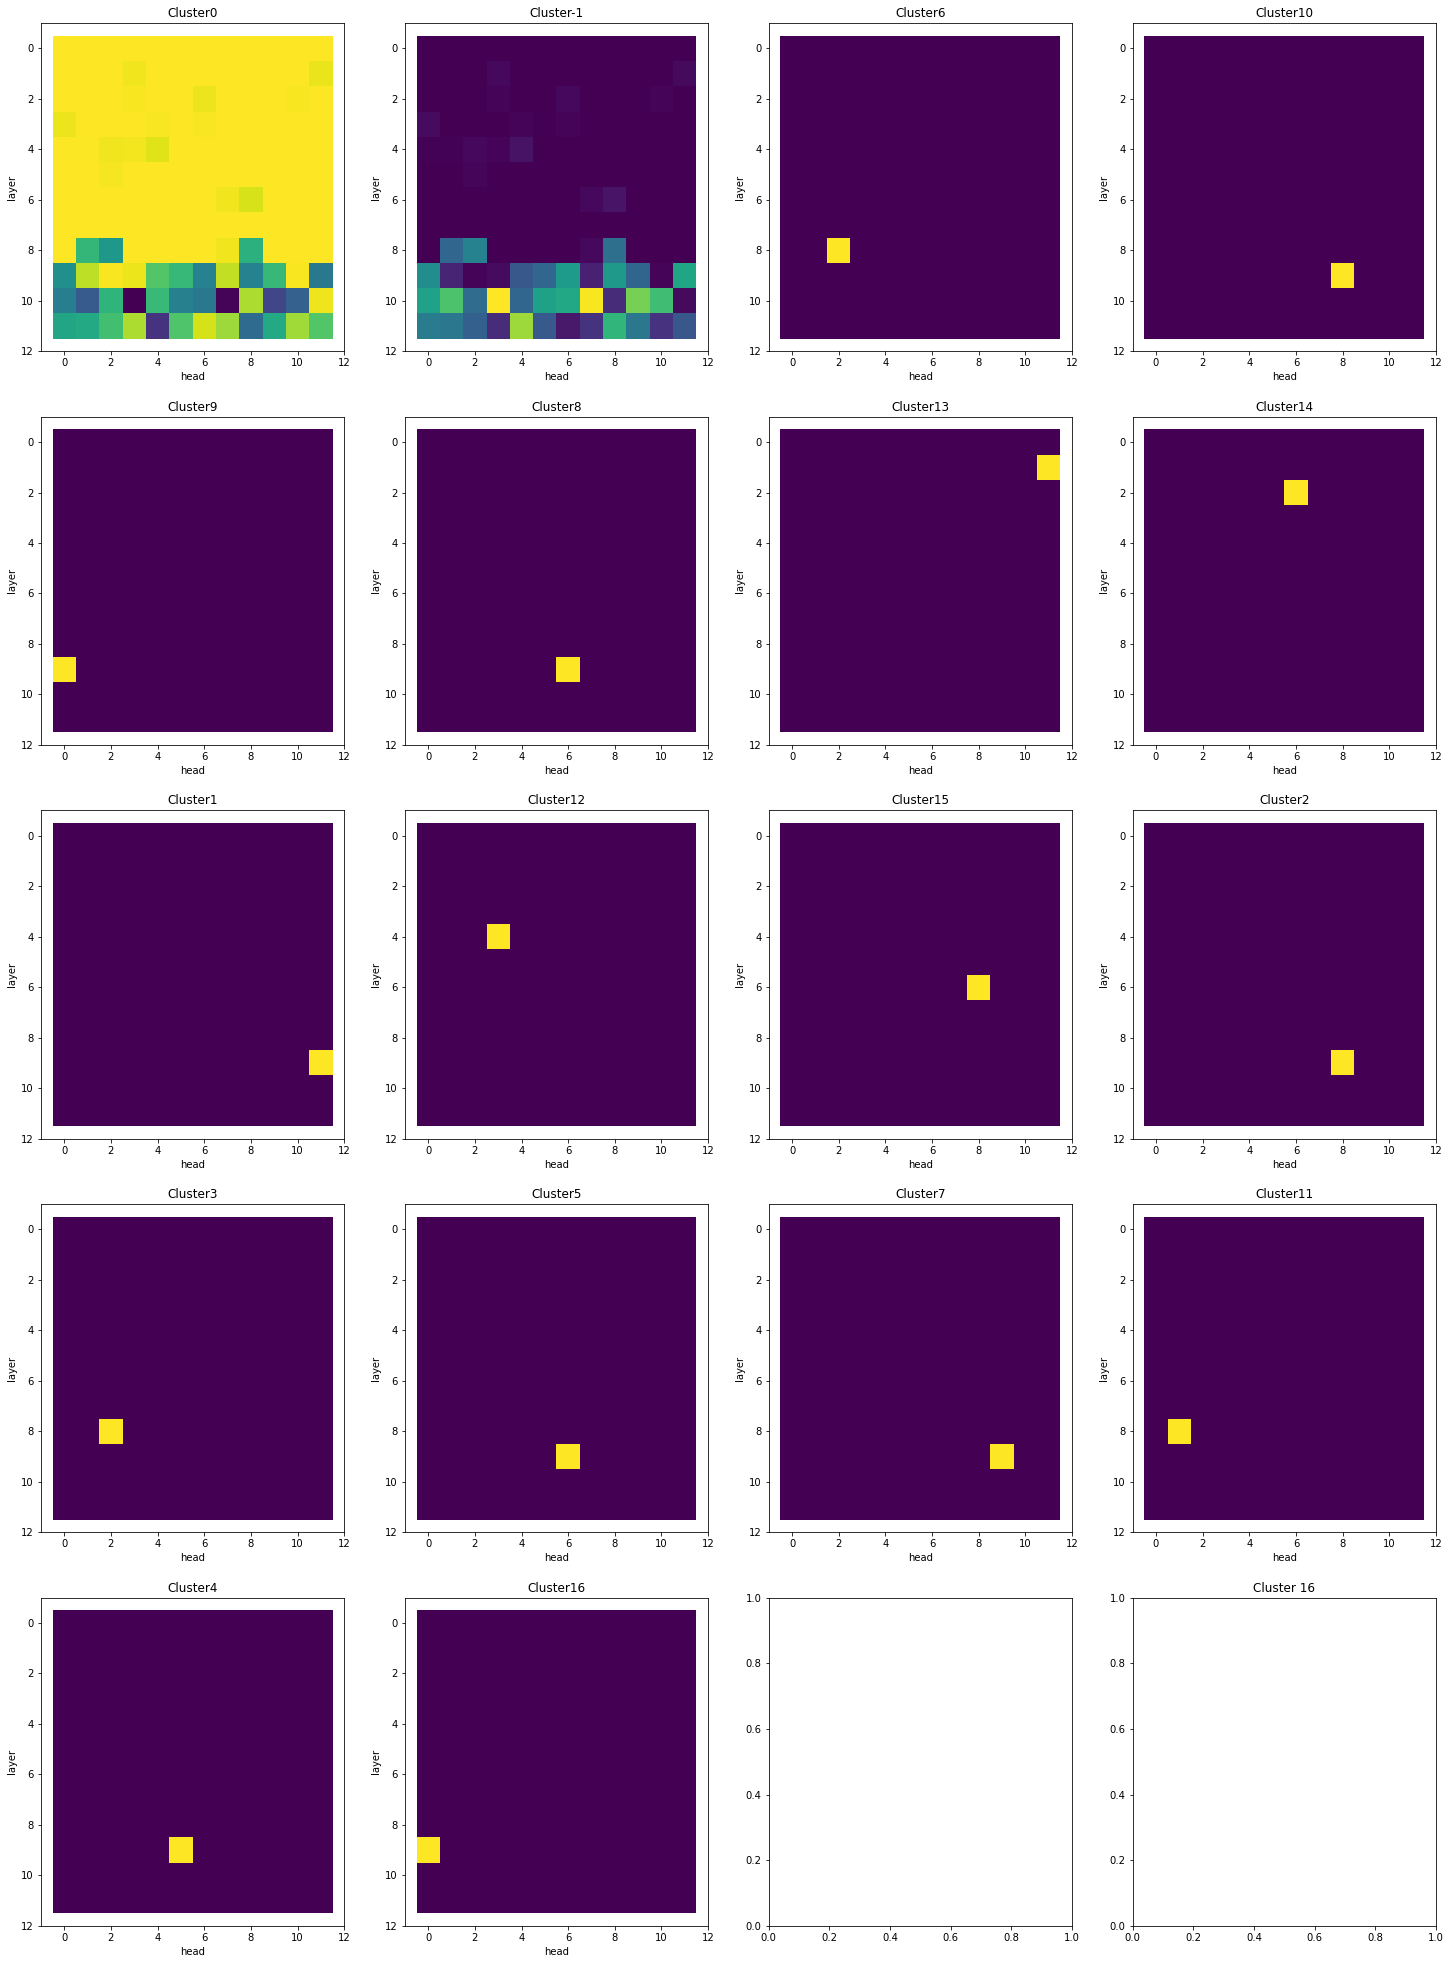

In [266]:
plot_density(df)

In [5]:
output_dir='/rapids/notebooks/host/representations/output/low_epsilon/'

In [269]:
# epsilon = 0.6333333333333333_10, min_samples=10
df = torch.load(os.path.join(output_dir,'dask_dbscan_0.6333333333333333_10_label_df.bin'))

clusters: 28

-1     174224
 0      41339
 2        112
 7         28
 8         21
 1         21
 22        20
 18        20
 14        18
Name: cluster, dtype: int64


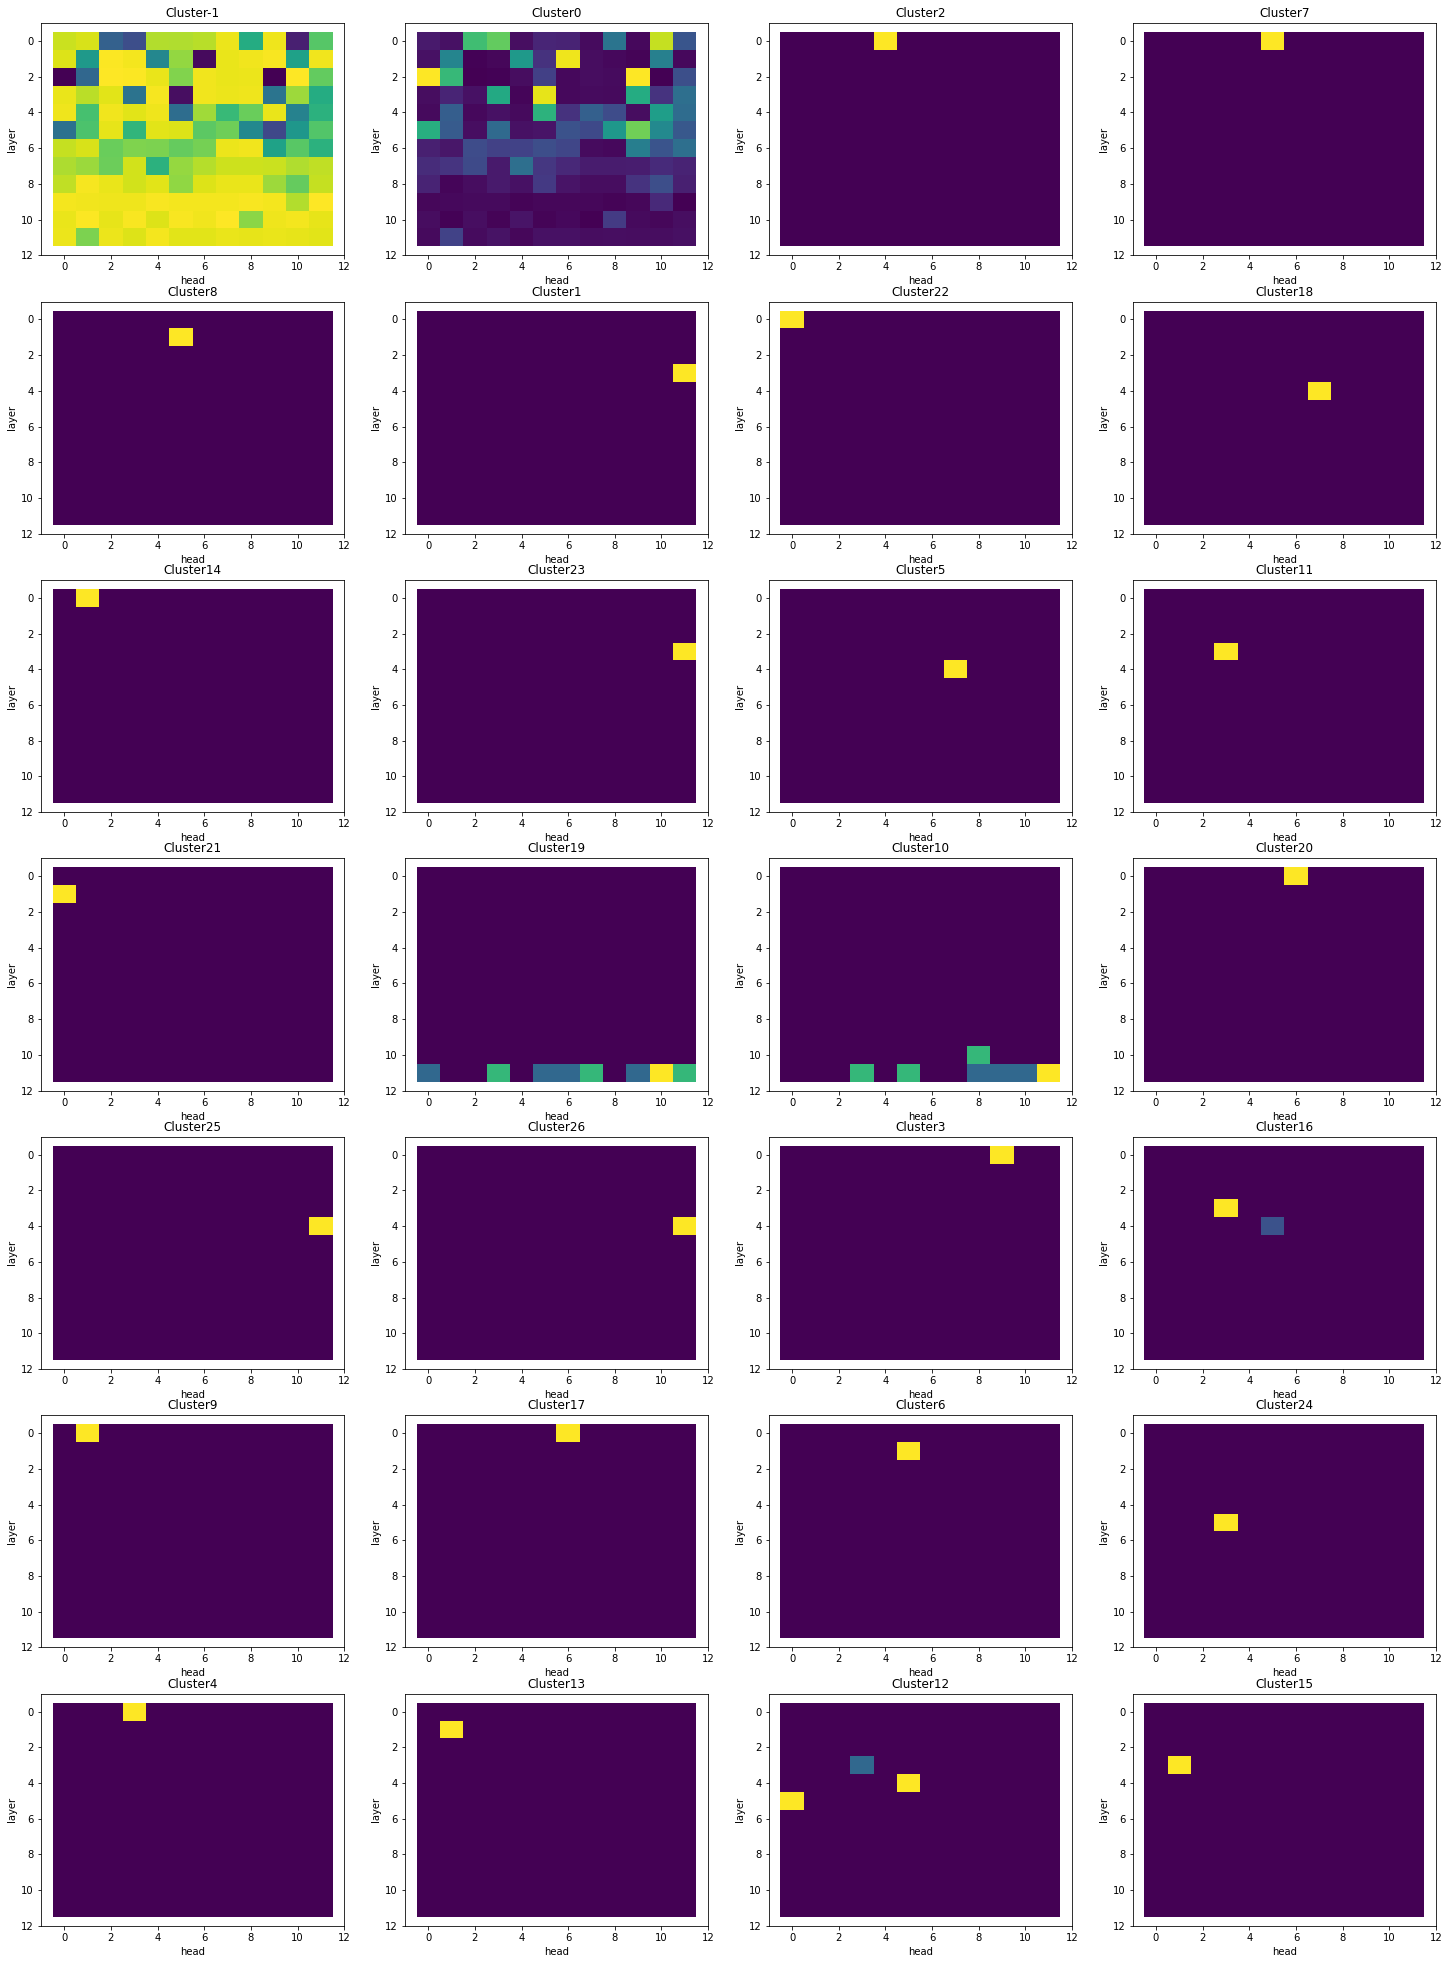

In [270]:
plot_density(df)

clusters: 18

-1     213260
 0       1774
 4        478
 1        159
 7         55
 2         54
 10        50
 9         42
 3         29
Name: cluster, dtype: int64


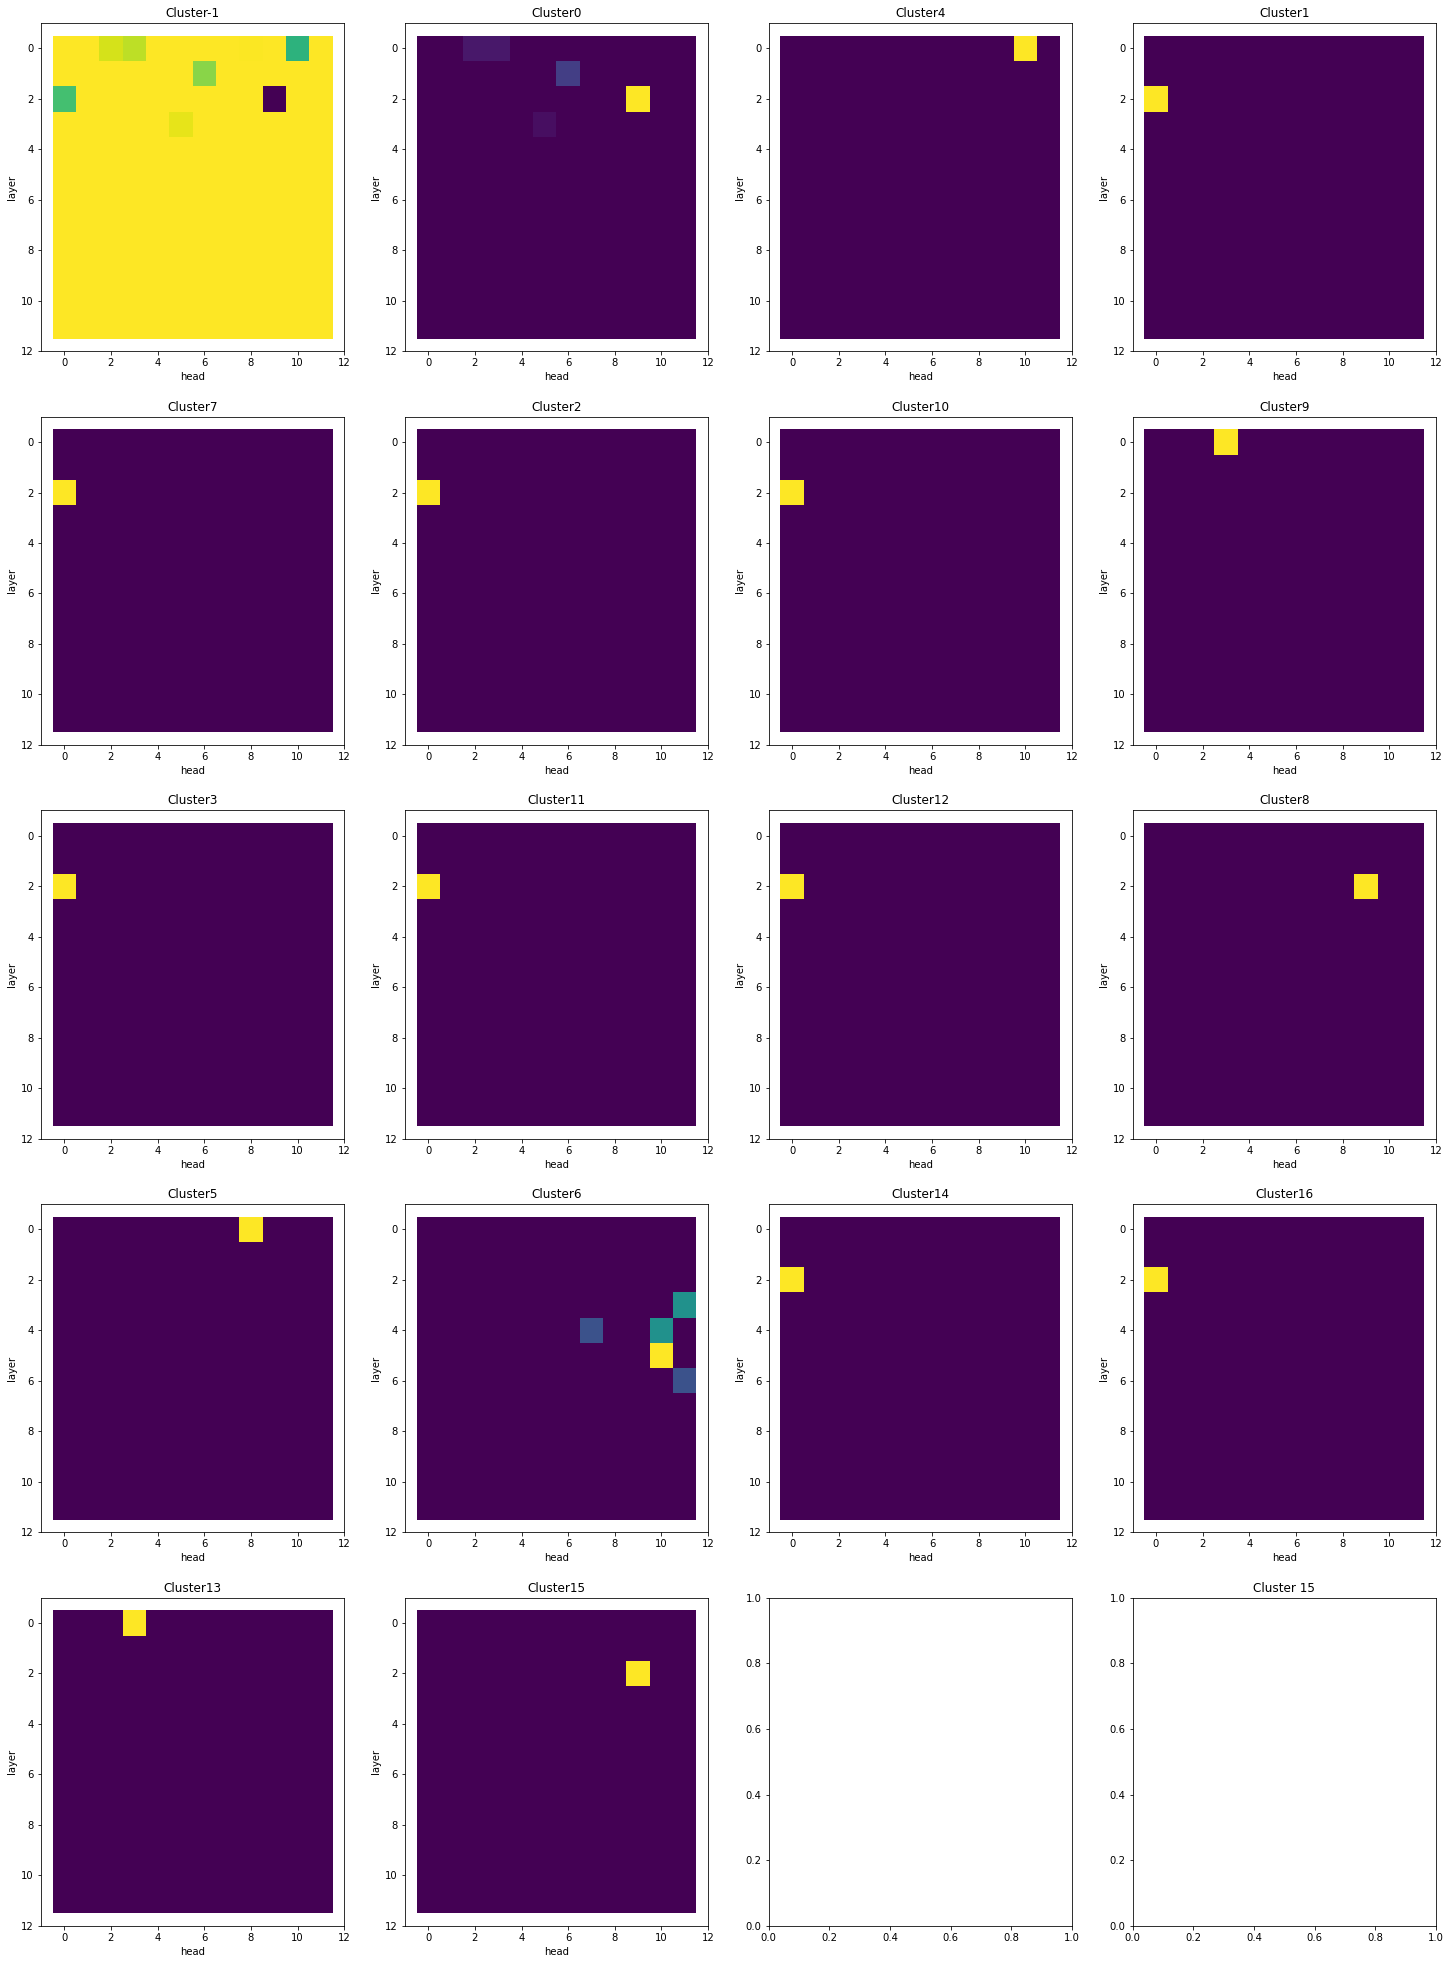

In [274]:
# epsilon = 0.4666_10, min_samples=10
df = torch.load(os.path.join(output_dir,'dask_dbscan_0.4666666666666667_10_label_df.bin'))
plot_density(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561600 entries, 0 to 561599
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   cluster  561600 non-null  int32
 1   layer    561600 non-null  int64
 2   head     561600 non-null  int64
dtypes: int32(1), int64(2)
memory usage: 10.7 MB


clusters: 646

-1     476443
 0      83688
 23        33
 1         25
 15        25
 13        23
 18        21
 10        19
 25        18
Name: cluster, dtype: int64


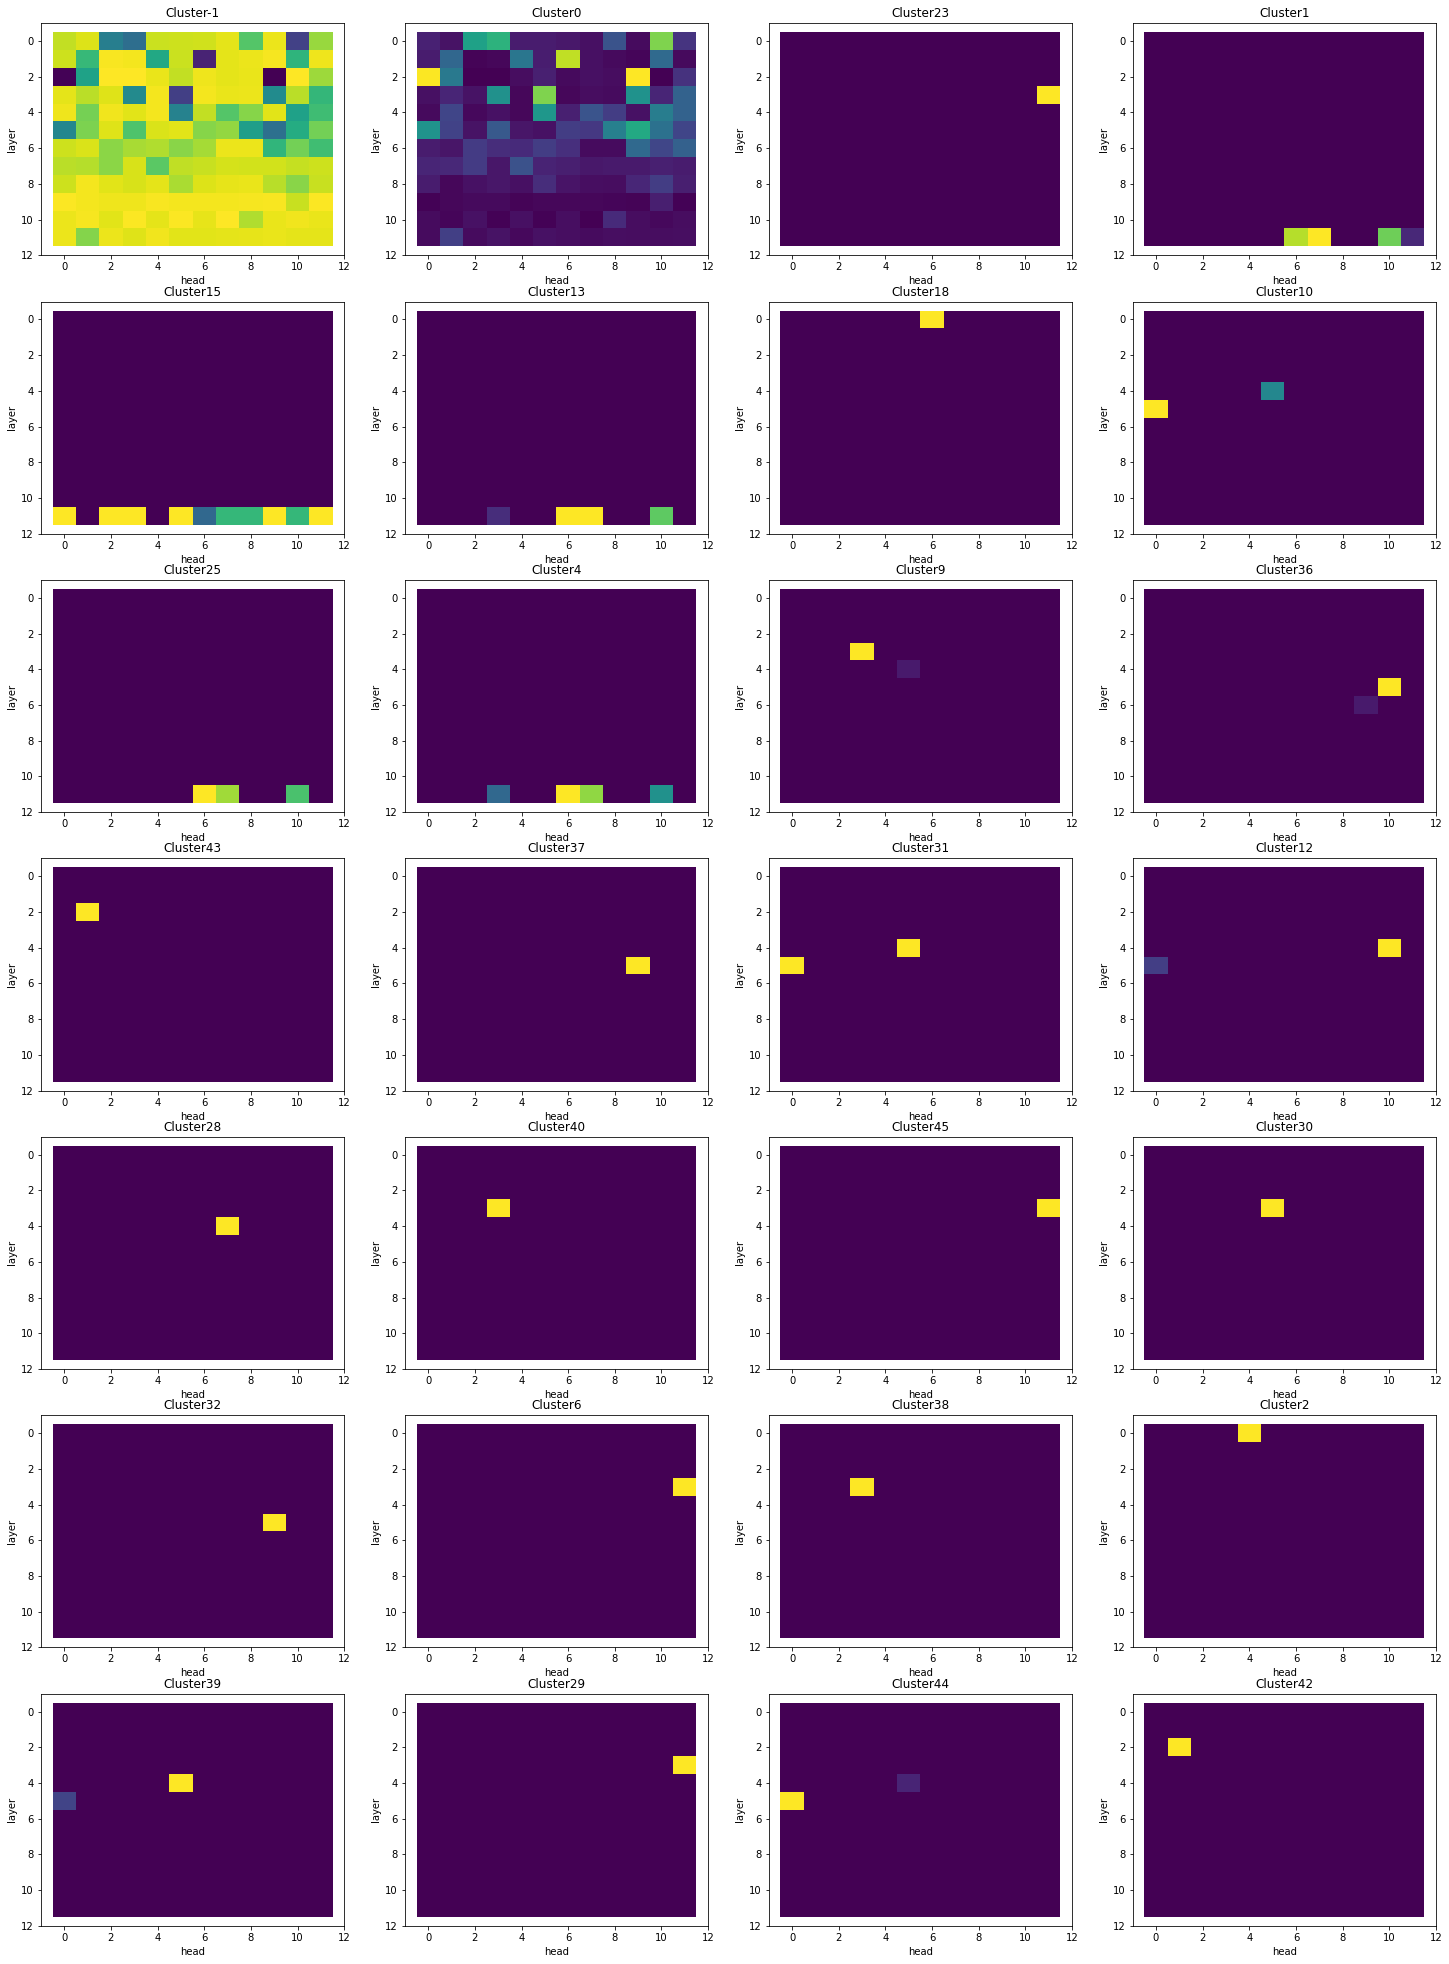

In [5]:
# epsilon = 0.6, min_samples=10
df = torch.load(os.path.join(output_dir,'dask_dbscan_0.6_10_label_df.bin'))
plot_density(df)

clusters: 283

-1      296926
 0      260713
 15        162
 3          93
 14         54
 206        49
 40         43
 29         42
 76         41
Name: cluster, dtype: int64


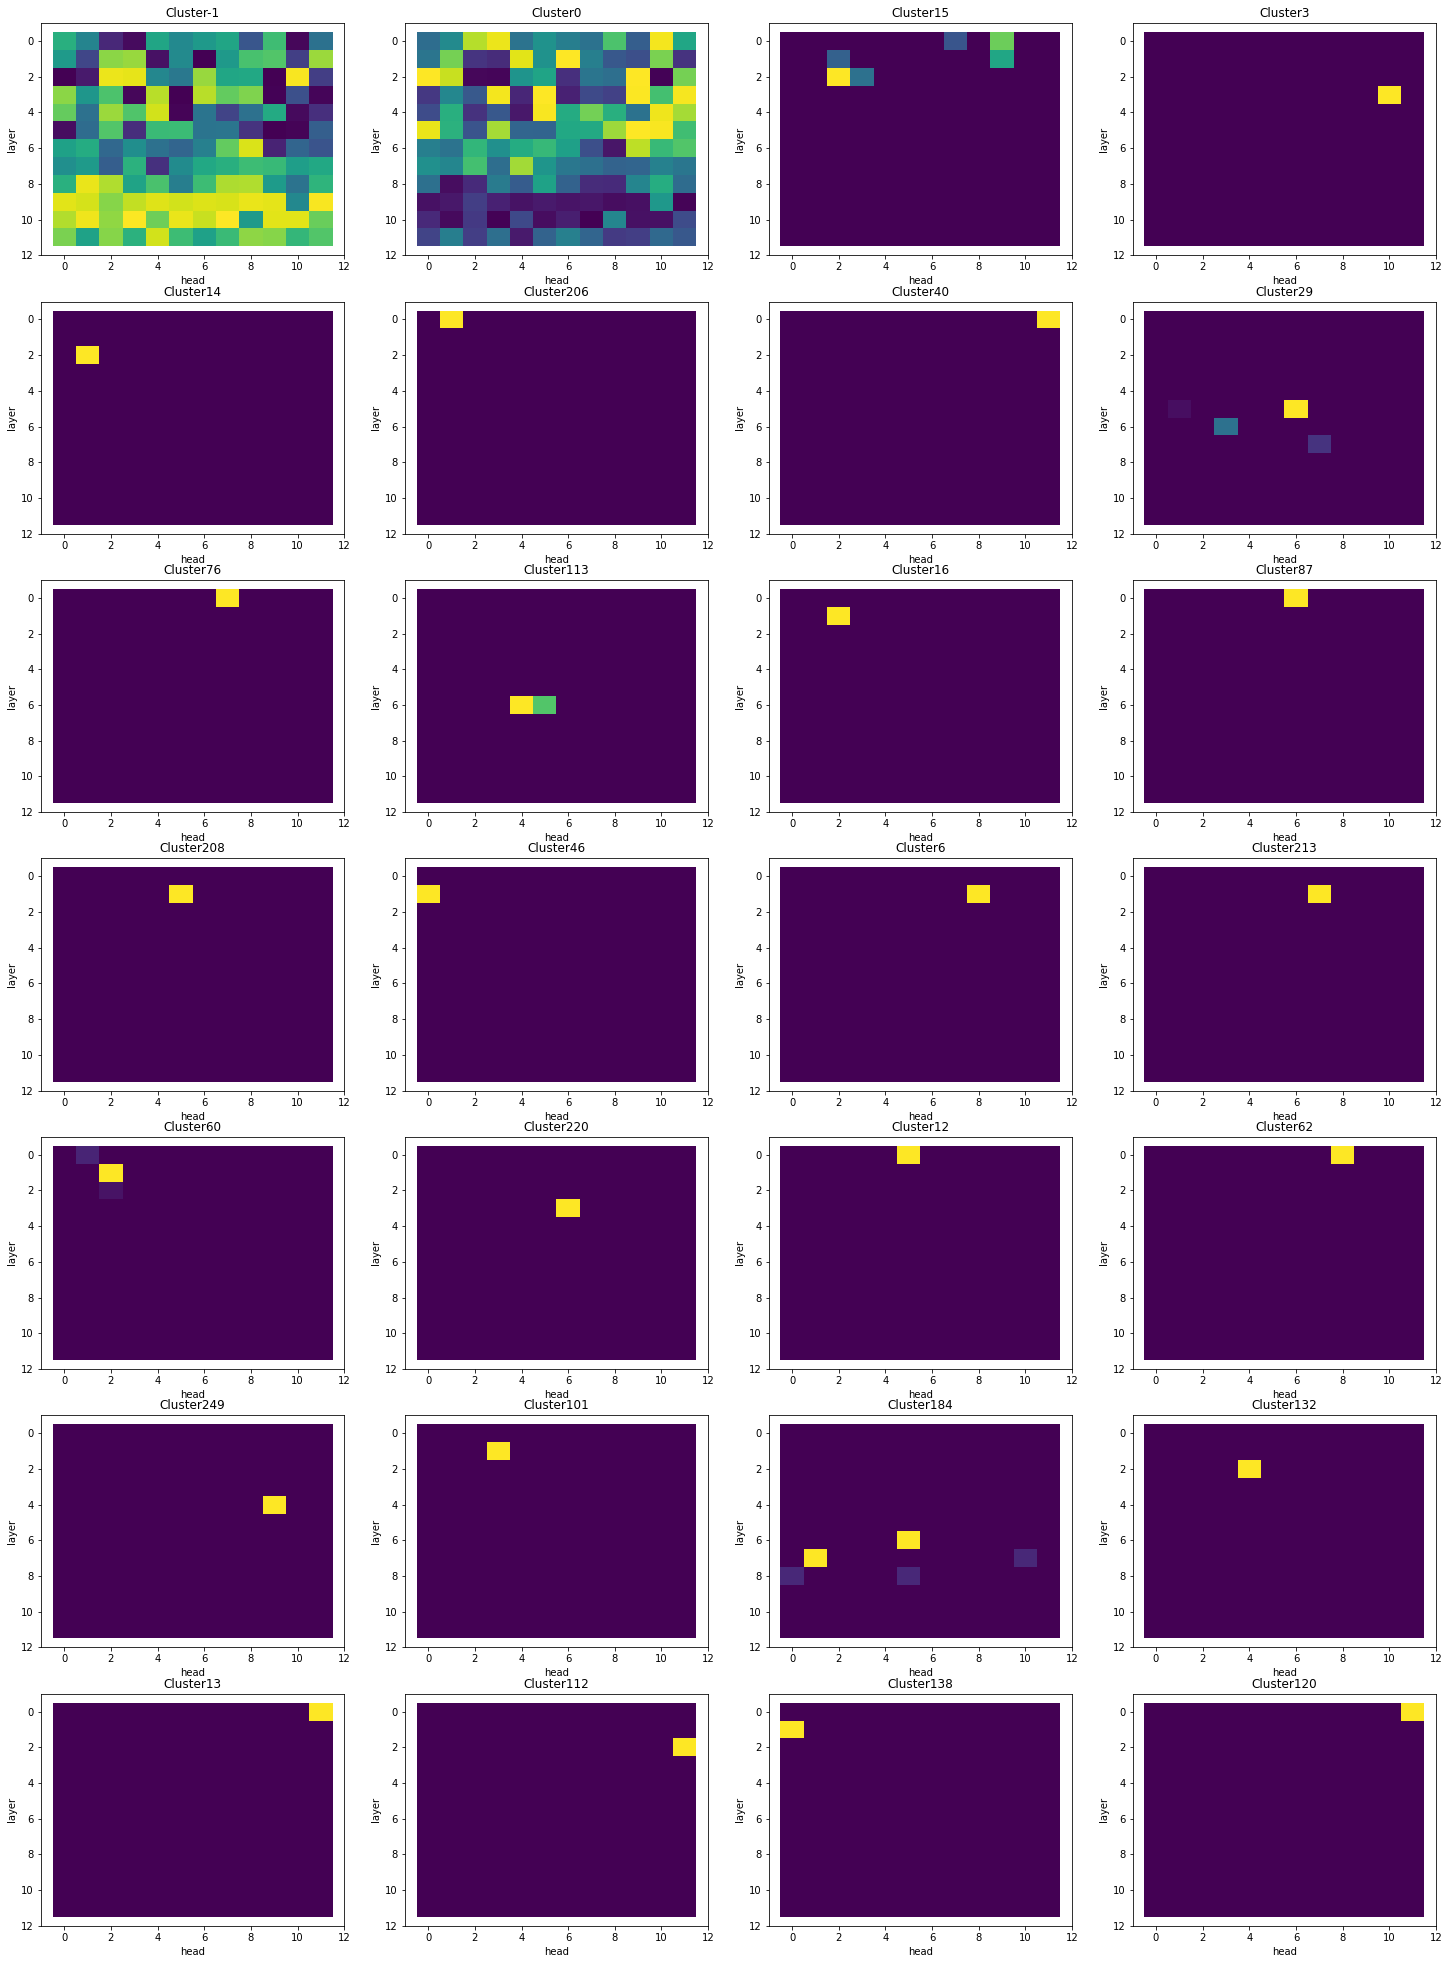

In [9]:
# epsilon = 0.7, min_samples=10
df = torch.load(os.path.join(output_dir,'dask_dbscan_0.7_10_label_df.bin'))
plot_density(df)

In [10]:
cluster_3 = df[df['cluster'] == 3]

In [19]:
cluster_3.head(10)

,cluster,layer,head
6670,3,3,10
6814,3,3,10
7102,3,3,10
7246,3,3,10
7390,3,3,10
7534,3,3,10
7678,3,3,10
19918,3,3,10
20494,3,3,10
22366,3,3,10


### note the interval of 144 between heads in the same cluster

In [16]:

for i in range(6670,7700,144):
    print(i)

6670
6814
6958
7102
7246
7390
7534
7678


In [20]:
cluster_3.tail(10)

,cluster,layer,head
515422,3,3,10
515566,3,3,10
515710,3,3,10
518878,3,3,10
530110,3,3,10
530398,3,3,10
530542,3,3,10
530686,3,3,10
530830,3,3,10
530974,3,3,10


In [23]:
for i in range(530398,531000,144):
    print(i)

530398
530542
530686
530830
530974
